IMPORTING LIBRARIES

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importing DataSet

In [41]:
data = pd.read_csv("/content/titanic.csv")

Creating a copy of data set so i can retrive the original data set when needed

In [42]:
df = data.copy()

Looking at the first 5 rows to know the details of it

In [43]:
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


DROPING THE COLUMNS WHICH DOESNT HAVE IMPACT ON SURVIVAL

In [46]:
df = df.drop(columns=["PassengerId","Name","Cabin","Ticket"])

Getting Correlation of each column

> Add blockquote



In [47]:
df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Visualtizing the Sex and Surivival rate

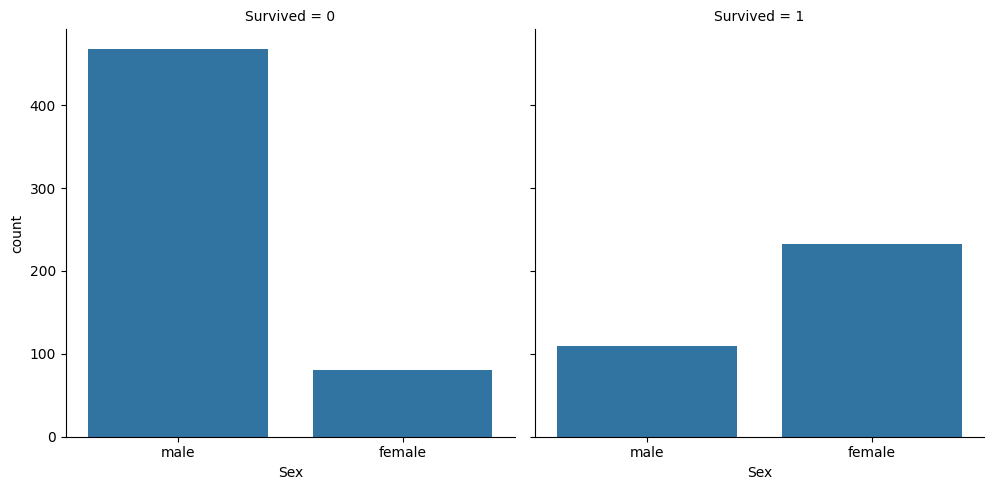

In [48]:
sns.catplot(data=df , x='Sex', col='Survived', kind='count')

Using FacetGrid to plot multiple features at once

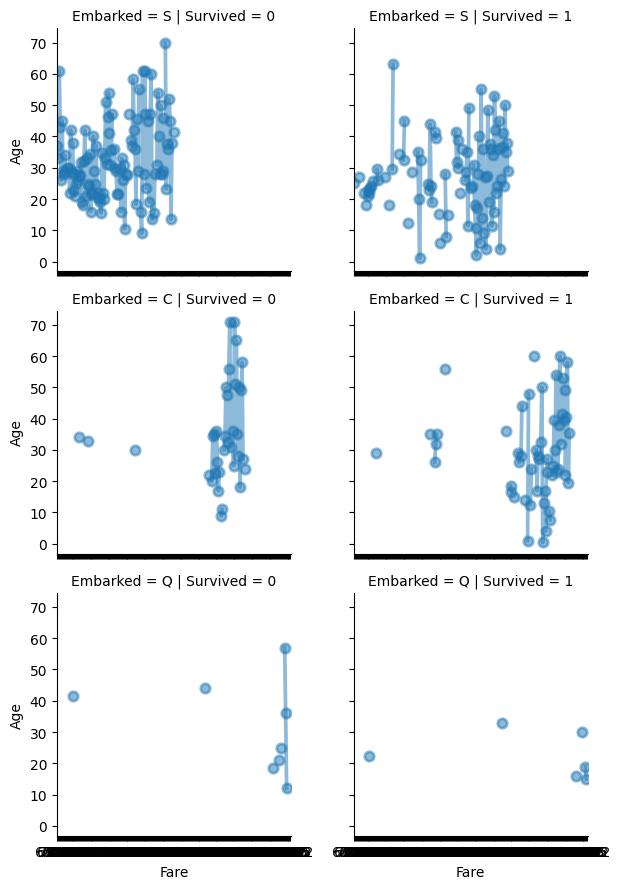

In [49]:
v= sns.FacetGrid(df, col='Survived', row='Embarked')
v.map(sns.pointplot, 'Fare', 'Age', alpha=0.5, ci=None)
v.add_legend()

Outlier Analysis with violin plot and box plot




In [50]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

<Axes: xlabel='Survived', ylabel='Age'>

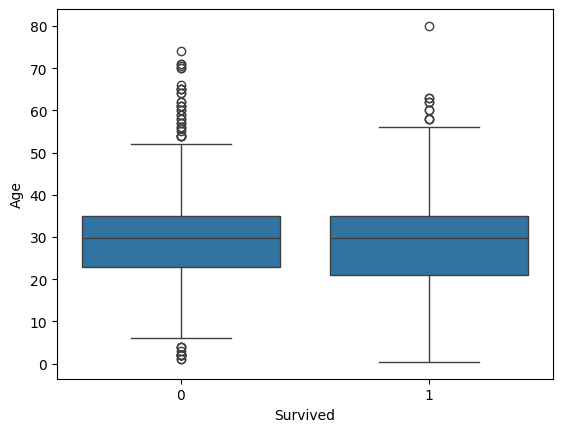

In [51]:
sns.boxplot( df, x='Survived', y='Age')


Dealing with Outliers in data

In [52]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

<Axes: xlabel='Survived', ylabel='Age'>

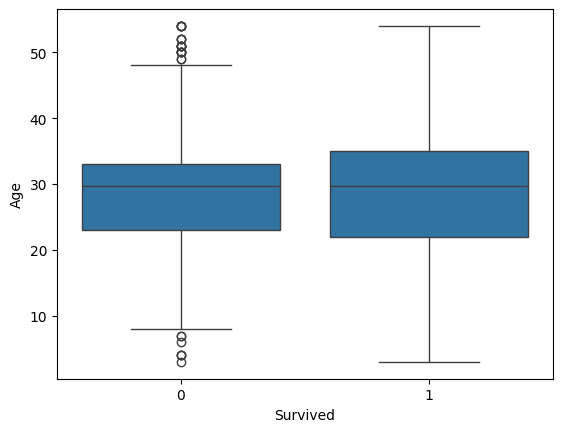

In [53]:
sns.boxplot( df, x='Survived', y='Age')

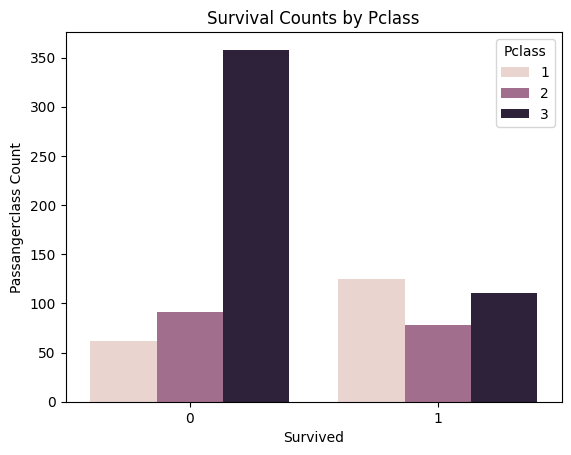

In [54]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Counts by Pclass')
plt.xlabel('Survived')
plt.ylabel('Passangerclass Count')
plt.show()

Encoding the categorical data

In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [56]:
df[['Sex','Embarked']]

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
...,...,...
886,1,2
887,0,2
888,0,2
889,1,0


## With the data cleaned and thoroughly analyzed, we can now split the dataset into training and test sets to build a model that can predict future inputs.

importing Sklearn Split the data set and standar scaling it for faster processing

In [57]:
X = df.drop(columns='Survived',axis=1)
Y = df['Survived']


In [58]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
X_scaled = scal.fit_transform(X)

In [59]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=43)

making reg dictionary and using it to finding the RMSE for all the regression models related and finding which fits the best

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
reg = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'DecisionTree': DecisionTreeRegressor(random_state=42)
}

In [61]:
for key, r in reg.items():
    r.fit(X_train, Y_train)
    training_score = cross_val_score(r, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    print(r.__class__.__name__, "has a training RMSE of", (-training_score.mean()) ** 0.5)

RandomForestRegressor has a training RMSE of 0.3689756040608724
GradientBoostingRegressor has a training RMSE of 0.3635226281789491
LinearRegression has a training RMSE of 0.3700426981311656
SVR has a training RMSE of 0.38305580223203467
DecisionTreeRegressor has a training RMSE of 0.4639072696145477


Now making similar classficaion model , the one which will have best accuracy we will tune it further to increase its accurqacy

In [62]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(probability=True),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}


In [63]:
for name, clf in clf.items():
    clf.fit(X_train, Y_train)
    training_score = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')
    print(f"{name} has a training accuracy of {training_score.mean():.4f}")

RandomForest has a training accuracy of 0.8091
GradientBoosting has a training accuracy of 0.8227
AdaBoost has a training accuracy of 0.8136
XGBoost has a training accuracy of 0.8182
SVC has a training accuracy of 0.8273
DecisionTree has a training accuracy of 0.7970
KNN has a training accuracy of 0.8000


# After Finding the best Model we do grid search to increase its accuracy

Now Applying Grid Search and Hyperparameter tunning to getting better predictions on graidentboosting classifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5]
}

clf = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

best_clf = grid_search.best_estimator_

cv_score = cross_val_score(best_clf, X_train, Y_train, cv=5, scoring='roc_auc')
print(cv_score.mean())

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
0.8752151462994837


Gradient Boosting Classifier ROC AUC: 0.8643


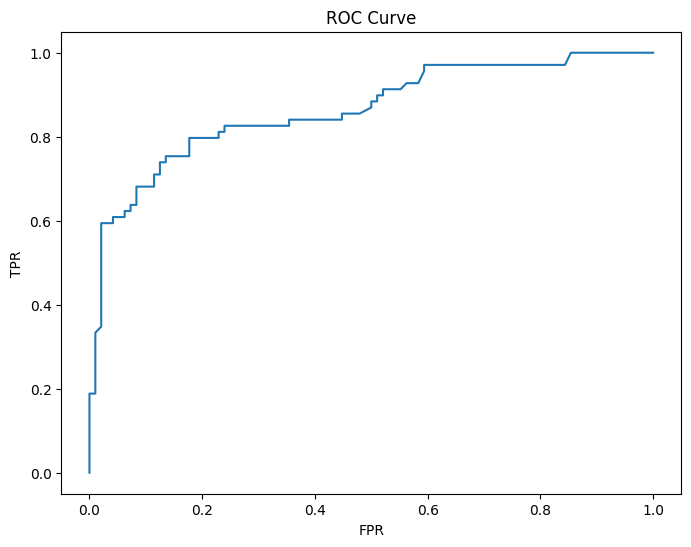

In [65]:

from sklearn.metrics import roc_auc_score, roc_curve

clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, Y_train)
y_proba = clf.predict_proba(x_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
print(f"Gradient Boosting Classifier ROC AUC: {roc_auc:.4f}")
fpr, tpr,i = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()


The Grid Search improved the accuracy to 87 percent